importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/raw/heart_disease_encoded.csv")
df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num(target)
0,1,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,2,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,3,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,4,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,5,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,917,62,1,1,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,1,4,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,2
918,919,58,1,4,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0


Exploratory data analysis

In [ ]:
# data inspection ->

print(df.shape)
print(df.dtypes)
print(df.isna().sum())

In [ ]:
# UNIVARIATE ANALYSIS ->
# distribution of various features used in the model ->
# countplots for categorical features and histplots for continous features ->

In [ ]:
# ploting categorical features ->

# function to make countplots for categorical features
def plot_categorical_feature(feature,df):
    plt.figure(figsize=(5,5))
    ax = sns.countplot(x=feature,data=df)
    plt.title(f'{feature} distribution')
    plt.show()

# categorical features -> sex, cp, fbs, restecg, exang, slope, ca, thal, target
cat_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal','num(target)']
for f in cat_features:
    plot_categorical_feature(f,df)

In [ ]:
# plotting continuous features ->

# function to make histplots for continuous features ->
def plot_continuous_feature(feature,df):
    plt.figure(figsize=(5,5))
    ax = sns.histplot(df[feature],kde=True)
    plt.title(f'{feature} distribution')
    plt.show()

# continuous features -> age, trestbps, chol, thalch, oldpeak
cont_features = ['age','trestbps','chol','thalch','oldpeak']
for f in cont_features:
    plot_continuous_feature(f,df)

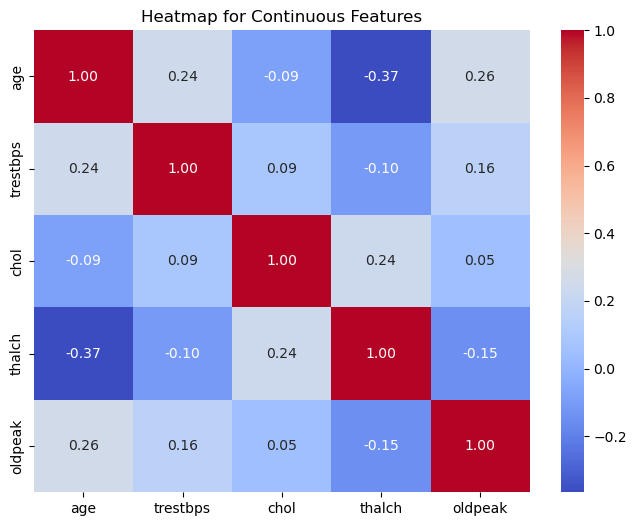

In [11]:
# plotting heatmap for continuous features to understand correlation ->
continuous_features = ['age','trestbps','chol','thalch','oldpeak']
corr_cont = df[continuous_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_cont, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap for Continuous Features")
plt.show()

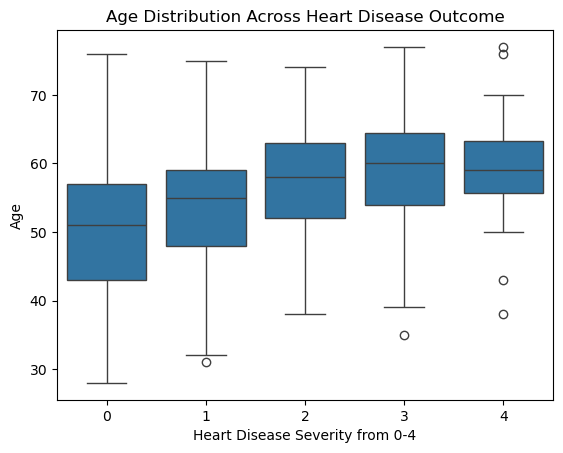

In [ ]:
# doing bi-variate analysis b/w age and target label ->
sns.boxplot(x='num(target)', y='age', data=df)
plt.title("Age Distribution Across Heart Disease Outcome")
plt.xlabel("Heart Disease Severity from 0-4")
plt.ylabel("Age")
plt.show()

# median age clearly increases as heart disease severity increases 

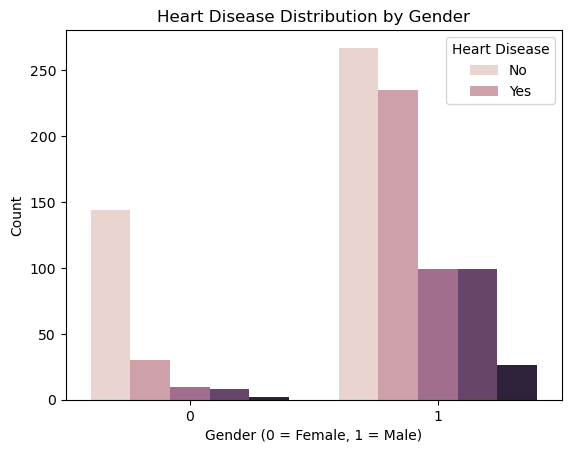

In [ ]:
# doing bi-variate analysis b/w gender and target variable ->
sns.countplot(x='sex', hue='num(target)', data=df)
plt.title("Heart Disease Distribution by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

# the plot clearly shows that heart disease is more prevalent in males than females.
# while males have a high number of data points, females predominantly fall in the no-disease class
# the indicates that gender is a relevant predictive feature.